# Feature Scaling D.C. Residential Properties

Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling. - z-score standardization and Min-max scaling.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler #z-score scaling
from sklearn.preprocessing import MinMaxScaler # Min-Max Scaling

%matplotlib inline

In [2]:
filepath = "DC_Properties.csv"

dcp_df1 = pd.read_csv(filepath)
dcp_df1.head()

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#removing columns with no impact on price
dcp_df=dcp_df1
dcp_df = dcp_df.drop(['Unnamed: 0','HEAT','WARD','AC','ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CITY', 
                      'CENSUS_TRACT', 'FULLADDRESS', 'ZIPCODE', 'SALEDATE','LIVING_GBA',
                      'LATITUDE', 'LONGITUDE','CENSUS_BLOCK', 'AYB','Y','QUADRANT','X', 
                      'CMPLX_NUM', 'YR_RMDL','FULLADDRESS','NATIONALGRID','CENSUS_BLOCK',
                      'STATE','CITY','EXTWALL','INTWALL','CENSUS_TRACT','ZIPCODE', 'QUALIFIED'], axis=1)



In [4]:
dcp_df.columns

Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'EYB', 'STORIES',
       'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'ROOF', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'SQUARE'],
      dtype='object')

In [5]:
#check if any missing values in the data
dcp_df.isnull().mean()

BATHRM               0.000000
HF_BATHRM            0.000000
NUM_UNITS            0.328774
ROOMS                0.000000
BEDRM                0.000000
EYB                  0.000000
STORIES              0.329051
PRICE                0.382122
SALE_NUM             0.000000
GBA                  0.328774
BLDG_NUM             0.000000
STYLE                0.328774
STRUCT               0.328774
GRADE                0.328774
CNDTN                0.328774
ROOF                 0.328774
KITCHENS             0.328781
FIREPLACES           0.000000
USECODE              0.000000
LANDAREA             0.000000
GIS_LAST_MOD_DTTM    0.000000
SOURCE               0.000000
SQUARE               0.000000
dtype: float64

In [6]:
dcp_df["NUM_UNITS"] = dcp_df["NUM_UNITS"].fillna(0)
dcp_df["STORIES"] = dcp_df["STORIES"].fillna(0)
dcp_df["KITCHENS"] = dcp_df["KITCHENS"].fillna(0)
dcp_df["GRADE"] = dcp_df["GRADE"].fillna("None")
dcp_df["STRUCT"] = dcp_df["STRUCT"].fillna("None")
dcp_df["ROOF"] = dcp_df["ROOF"].fillna("None")
dcp_df["STYLE"] = dcp_df["STYLE"].fillna("None")
dcp_df["CNDTN"] = dcp_df["CNDTN"].fillna("None")

In [7]:
#GIS_LAST_MOD_DTTM
dcp_df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(dcp_df['GIS_LAST_MOD_DTTM'])
dcp_df.dropna(subset=['GIS_LAST_MOD_DTTM'], inplace=True)

In [8]:
dcp_df = dcp_df.drop(["GRADE","STRUCT","ROOF","STYLE","CNDTN", 'GIS_LAST_MOD_DTTM','SOURCE','SQUARE'],axis=1)

In [9]:
#fILLING NA Values
mean_GBA = np.mean(dcp_df.GBA)
dcp_df['GBA']=dcp_df.GBA.fillna(mean_GBA)

In [10]:
dcp_df = dcp_df.dropna(subset=['PRICE'])

In [11]:
#check if any missing values in the data
dcp_df.isnull().mean()

BATHRM        0.0
HF_BATHRM     0.0
NUM_UNITS     0.0
ROOMS         0.0
BEDRM         0.0
EYB           0.0
STORIES       0.0
PRICE         0.0
SALE_NUM      0.0
GBA           0.0
BLDG_NUM      0.0
KITCHENS      0.0
FIREPLACES    0.0
USECODE       0.0
LANDAREA      0.0
dtype: float64

In [12]:
dcp_df

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA
0,4,0,2.0,8,4,1972,3.0,1095000.0,1,2522.000000,1,2.0,5,24,1680
2,3,1,2.0,9,5,1984,3.0,2100000.0,3,2522.000000,1,2.0,4,24,1680
3,3,1,2.0,8,5,1984,3.0,1602000.0,1,2484.000000,1,2.0,3,24,1680
5,3,2,1.0,10,5,1972,4.0,1950000.0,1,5344.000000,1,1.0,4,11,2196
7,3,1,2.0,8,4,1972,3.0,1050000.0,1,2401.000000,1,2.0,1,24,1627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158951,3,1,0.0,5,3,1938,0.0,389000.0,1,1714.539889,1,0.0,0,16,502
158952,1,0,0.0,3,1,1938,0.0,399900.0,4,1714.539889,1,0.0,0,16,394
158953,1,0,0.0,4,2,1938,0.0,416000.0,1,1714.539889,1,0.0,0,16,506
158954,2,0,0.0,4,2,1920,0.0,600000.0,1,1714.539889,1,0.0,0,16,467


In [13]:
#descriptive statistics
dcp_df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA
count,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,9.821600e+04,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000
mean,1.859157,0.444541,0.719842,5.921836,2.606480,1965.759876,1.251813,9.313516e+05,1.862446,1721.169842,1.000143,0.737415,3.521972,14.613393,2084.296123
std,0.978321,0.576217,0.768342,2.637816,1.393801,27.500116,3.206172,7.061325e+06,1.399710,634.109845,0.011938,0.797797,937.972785,3.683449,2765.429658
min,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000
25%,1.000000,0.000000,0.000000,4.000000,2.000000,1954.000000,0.000000,2.400000e+05,1.000000,1404.000000,1.000000,0.000000,0.000000,11.000000,482.000000
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1965.000000,2.000000,3.999990e+05,1.000000,1714.539889,1.000000,1.000000,0.000000,13.000000,1380.000000
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1981.000000,2.000000,6.520000e+05,3.000000,1714.539889,1.000000,1.000000,1.000000,17.000000,2556.000000
max,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,826.000000,1.374275e+08,15.000000,15902.000000,2.000000,44.000000,293920.000000,117.000000,187301.000000


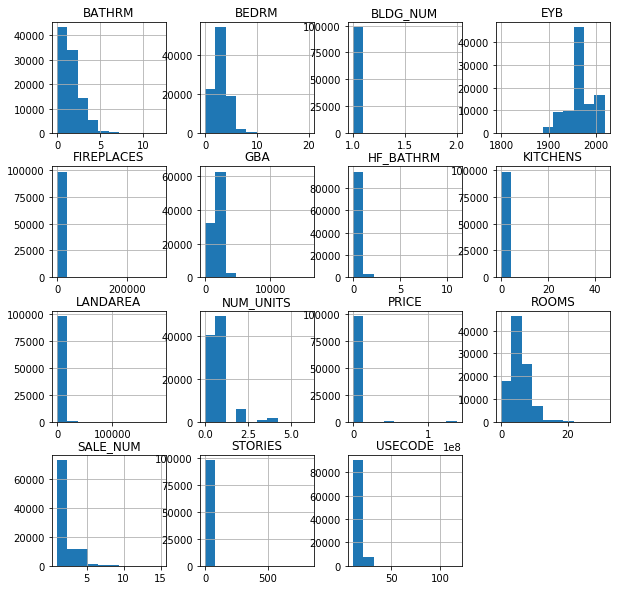

In [14]:
#plot the frequency count for each column
dcp_df.hist(figsize=(10,10));

We can see from the descriptive statistics and the frequency distribution plots that each feature (column) has varying ranges. Features such as Insulin have a high maximum value but other features like DiabetesPedigreeFunction have low maximum values.

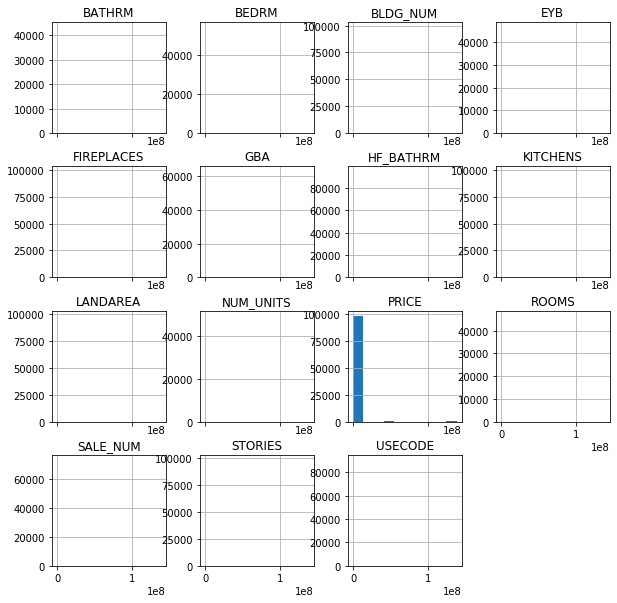

In [15]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
dcp_df.hist(figsize=(10,10), sharex=True);

**Scaling will help to find any drastic effects that occur in the data when comparing multiple features. If we try to see any effects when putting the features on the same scale in the default data, as in the above charts, smaller values cannot be seen.**

### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [16]:
#first 5 rows of the 'Glucose' column
dcp_df['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

In [17]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = dcp_df['PRICE'].mean()

#standard deviation of the column
std = dcp_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (dcp_df['PRICE'] - mean)/std

In [18]:
#values for mean and standard deviation of 'Glucose column'
mean, std

(931351.5949336156, 7061324.955612032)

In [19]:
price_z_manual.mean(), price_z_manual.std()

(5.337655258732351e-16, 1.0000000000000109)

In [20]:
#first 5 rows of z-score standardized 'Glucose' column
price_z_manual.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [21]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(dcp_df[['PRICE']])

In [22]:
#mean and standard deviation of z-score standardized 'Glucose' column
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [23]:
price_zscore[:5]

array([[0.02317543],
       [0.16550072],
       [0.09497535],
       [0.14425814],
       [0.01680266]])

In [24]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(price_zscore.reshape(-1))

In [25]:
#first 5 rows of z-score standardized glucose column
price_z_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

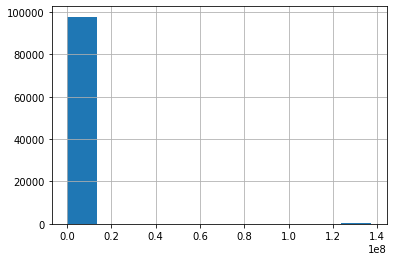

In [26]:
#BEFORE: frequency count plot of 'Glucose' column
dcp_df['PRICE'].hist()

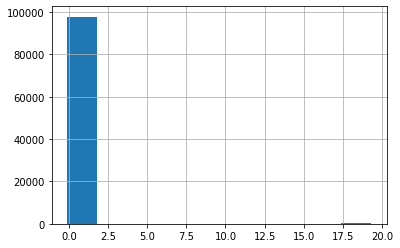

In [27]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
price_z_col.hist()

In [28]:
colnames = list(dcp_df.columns)
colnames

['BATHRM',
 'HF_BATHRM',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'EYB',
 'STORIES',
 'PRICE',
 'SALE_NUM',
 'GBA',
 'BLDG_NUM',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA']

In [29]:
dcp_df.isnull().mean()

BATHRM        0.0
HF_BATHRM     0.0
NUM_UNITS     0.0
ROOMS         0.0
BEDRM         0.0
EYB           0.0
STORIES       0.0
PRICE         0.0
SALE_NUM      0.0
GBA           0.0
BLDG_NUM      0.0
KITCHENS      0.0
FIREPLACES    0.0
USECODE       0.0
LANDAREA      0.0
dtype: float64

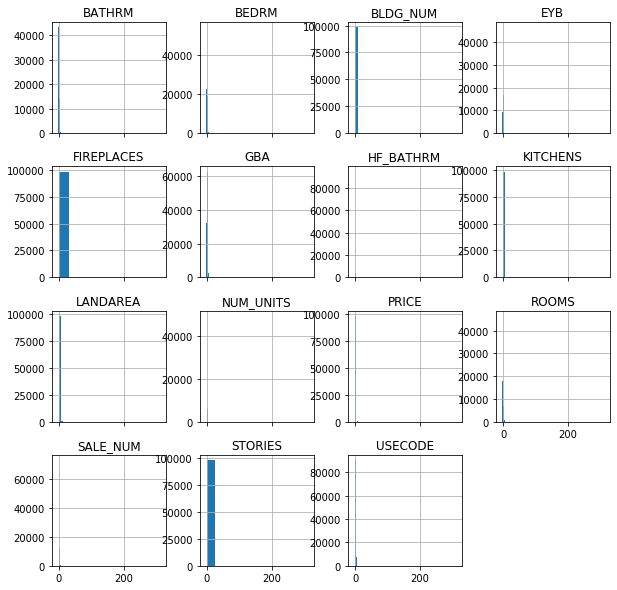

In [30]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(dcp_df.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(dcp_df), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True);

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [31]:
#let us do it manually first
min_val = dcp_df['PRICE'].min()
max_val = dcp_df['PRICE'].max()

price_minmax = (dcp_df['PRICE'] - min_val)/ (max_val - min_val)

price_minmax.head()

0    0.007968
2    0.015281
3    0.011657
5    0.014189
7    0.007640
Name: PRICE, dtype: float64

In [32]:
price_minmax.min(), price_minmax.max()

(0.0, 1.0)

In [33]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [34]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
price_minmax = minmax_sc.fit_transform(dcp_df[['PRICE']])

In [35]:
#mean and standard deviation of Min-Max 'Glucose' column
price_minmax.mean(), price_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [36]:
# 2D array
price_minmax[:5]

array([[0.00796783],
       [0.01528077],
       [0.01165704],
       [0.01418929],
       [0.00764038]])

In [37]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [38]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

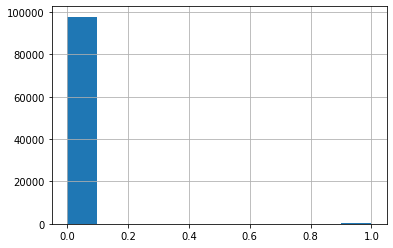

In [39]:
price_mm_col.hist()

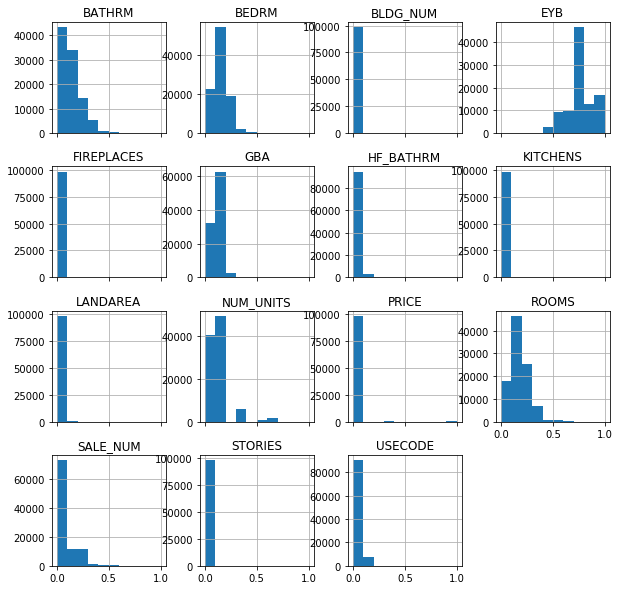

In [40]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(dcp_df), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True);

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering